## Final Project
* For my final project, i am working with Jaylene B, analysing Spotify Data. We did a few analysis points:
    * Jaylene and I compared our data to see who had more listening time over specific months.

## Stats
* Here is a number of various stats regarding my data

In [4]:
import pandas as pd
# import numpy as np

# First let's import the data
json_df = pd.read_json("carson_StreamingHistory.json")

# Now to compute stats!

# Average Listen Time Per Song
song_arr = json_df["msPlayed"]
song_count = 0
length_total = 0
for lengths in song_arr:
    song_count += 1
    length_total += lengths
avg_listen_time_ms = length_total / song_count
avg_listen_time_minutes = avg_listen_time_ms / 60000 #since there are 60,000 milliseconds in a minute!
# print("Average Listen Time Per Song (in minutes):", avg_listen_time_minutes)

# Longest Song
longest_song_ms = json_df["msPlayed"].max()
longest_song_data = json_df.loc[json_df["msPlayed"] == longest_song_ms]
print("Longest Song Listen Time Data:")
# print(longest_song_data)
# I know this song isnt actually the longest, as a I know this is only 5 minute song, and
# there are other songs nearing 9 minutes. I think it tracked this song for longer than 9 minutes due to 
# it possibly being replayed mid-song (AKA I replayed the song before it actually ended).

# Shortest Song
shortest_song_ms = json_df["msPlayed"].min()
shortest_song_data = json_df.loc[json_df["msPlayed"] == shortest_song_ms]
print("Shortest Song Listen Time Data:")
# print(shortest_song_data)
# the reason why there are so many of these is due to the fact of me skipping over a number of songs at once
# for example, I would listen to a "spotify radio" for so long it would turn to songs I didnt know, so I would imediately skip them.

# Average Letters Per Song Title
track_arr = json_df["trackName"]
title_count = 0
total_letters = 0
for titles in track_arr:
    title_count += 1
    for letters in titles:
        total_letters += 1
avg_letters_per_title = total_letters / title_count
# print("Average Letters Per Song Title:", avg_letters_per_title)

# Average Letters per Artist Name
artist_arr = json_df["artistName"]
artist_count = 0
total_letters = 0
for artist in artist_arr:
    artist_count += 1
    for letters in artist:
        total_letters += 1
avg_letters_per_artist = total_letters / title_count
# print("Average Letters Per Artist Name:", avg_letters_per_artist)

# Top Artists
top_15_artists = artist_arr.value_counts().head(15)
# print("My Top 15 Spotify Artists Based Off Songs Listened To:")
print(top_15_artists)

ValueError: Expected object or value

### Cleaning:
* There is very little/no cleaning needed for this data. The biggest factor in this cateogry would be if song length were to be analyzed in the future, the milliseconds would have to be converted into minutes and seconds. For the following hypothesis tests and visualizations, it's not needed. 

### Visualizations:
I have chosen to create a bar graph of my 15 top artists: how many times I have listened to the artist and the number of times my most listened song of theirs was played.

NameError: name 'top_15_artists' is not defined

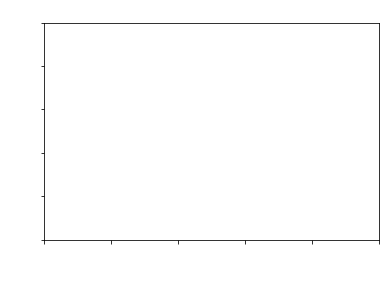

In [ ]:
# I know I already imported these in a previous cell but it wouldn't run if I didn't import again... :(
import numpy as np
import pandas as pd

# Creating the Graphs:

# creating a series for the top 5 artist:
# data inputed in increasing order:
num_of_streams = np.array([483, 487, 212, 149, 96, 95, 77, 74, 70, 67, 60, 56, 53, 48, 48])   # total artist streams (all albums, all songs)
num_of_genre = np.array([4, 3, 1, 1, 5, 1])
genre_for_artist = np.array(["rap", "hiphop", "alternative", "rock", "pop", "alternative pop rock"])
artist_for_streams = ["Kanye West", "Mac Miller", "Joji", "JAY-Z", "J. Cole", "Kid Cudi", "Cage The Elephant", "The Weeknd", "Drake", "Aminé", "Dominic Fike", "Rihanna", "Katy Perry", "Maroon", "B.o.B"] 
artist_ser = pd.Series(num_of_streams, index=artist_for_streams)
# genre_ser = pd.Series(genre_for_artist, index=artist_for_streams)

# Let's visualize some Data!
import matplotlib.pyplot as plt
# Let's start with my top artist and the amount of songs each have

plt.figure()
plt.xlabel("Artists", color="white")
plt.xticks(rotation=55, ha="right", color="white")
plt.yticks(color="white")
plt.ylabel("Total Songs Played", color="white")
plt.title("Top 15 Artists/Songs Listened To", color="white")
# this creates a new current figure, instead of adding to the previou one
plt.bar(top_15_artists.index, top_15_artists)
# plt.savefig("bar_example.png")

def pie_chart(x_ser, y_ser):
    plt.figure() # will create a new "current" figure
    plt.title("Spotify Genre For Top 15 Artists")
    plt.pie(y_ser, labels=x_ser, autopct="%.2f%%")      # pass in only y_ser because that has the acutal counts of the data... use x_ser as the labels, autppct = auto percent... how to automatically display percentages for pie sectors. the %% will display two decimal places i think... either way just keep the formatting of it the same
    plt.savefig("Genre_Chart.png")

# Bar Graph:
# call bar_chart 
# plt.bar(artist_for_streams, artist_ser, "Spotify Streaming Data: Most Popular Artist", "Most_Popular_Artist.png")     # calling graph for total of all streams from an artist(spanning multiple albums)
# Pie Chart:
pie_chart(genre_for_artist, num_of_genre)

## Hypothesis 1:
* I want to test and see if I listen to more Mac Miller songs than I do

### Hypothesis Testing:
Is Carson more likely to listen to pop genre from the given time frame of 2021-06-26 to 2022-01-29?
- took top 15 artists and found their genre
- pop occurs _ times as the genre of the top artists

1. Identify null and alternative hypothesis  
* H0: M(pop) $\ge$ 4 
* H1: M(pop) < 4

2. Level of significance  
$ \alpha = 0.01 $

3. Select test statistic:
test statistic: $$ t = \frac{\overline{x} - \mu }{\frac{s}{\sqrt{n}}} $$

4. Computations:
- is a left-tailed test
- df = 6-1 = 5 (because there are 6 different genres)
- t-table value = 2.998
- if t-computed > 2.998 then we reject H0. If t-commputed is less than or equal to 2.998, then we cannot reject H0.
- this results in: $$ t = \frac{2.14 - 4 }{\frac{1.21}{\sqrt{6}}} $$ $$ t (computed) = -2.086 $$

5. Decision:  
At a level of 0.01 significance, we cannot reject H0 since t-computed (-2.086) < t-critical (2.998). Thus we cannot say that pop is more likely to be listened to.  
- double check work with python code:

In [ ]:
from scipy import stats
import numpy as np
# let's check our work with scipy
num_of_genre = np.array([4, 3, 1, 1, 5, 1])
len_num_of_genre = len(num_of_genre)
std = np.std(num_of_genre, ddof=1)
mean = np.mean(num_of_genre)
# print(len_num_of_genre, mean, std)
t, pval = stats.ttest_1samp(num_of_genre, 4)
pval /= 2 # p-value = the probablity that this sample comes from this distribution
print("t:", t, "pval", pval)
alpha = 0.01
if alpha < pval:
    print("reject H0")
else: 
    print("do not reject H0")

t: -2.0868250309207568 pval 0.04563356323729004
reject H0


### Other Hypothesis Testing Ideas (future brainstorming):
- could the results change if we're basing the analysis from another time frame
- what about if you look at all of the streaming data




### Conclusion:
Overall, my top 15 artists were heavily centered around pop music. However, based on the table of streams and the hypothesis testing above, we cannot conclude that I am more likely to listen to pop more than any other genre. Because of this, one of my initial predictions was wrong. I think it's interesting how there are many different versions of pop!

However, some of my initial predictions were correct. For example, my favorite artist was clearly Taylor Swift and my thrid artist was Lana Del Rey!


Sum total amount of data listened to on a given day. H0: we listen to the same amount. H1, we dont listen ot the same amount
- groupby genre to find 